In [42]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import itertools
import json
import sys
import os

In [50]:
MIN_COST = None

In [113]:
# arr_pherom_decay = np.linspace(0.1, 0.9, 9)
# arr_pherom_q = np.linspace(1, 100, 9)
# bs_epoch_product = 10 ** 4
# arr_bs = np.linspace(10, 1000, 4)
# arr_epochs = (bs_epoch_product / arr_bs).astype(np.int32)
# arr_bs = arr_bs.astype(np.int32)
# arr_use_pherom_bounds = ["true", "false"]

arr_pherom_decay = [0.1]
arr_pherom_q = np.linspace(10, 500, 9)
arr_bs = [300]
arr_epochs = [50]
arr_use_pherom_bounds = ["false"]
arr_pherom_exp = [0.5, 1.0, 2.0, 3.0]

In [114]:
arr_pherom_decay, arr_pherom_q, arr_pherom_exp, arr_bs, arr_epochs, arr_use_pherom_bounds

([0.1],
 array([ 10.  ,  71.25, 132.5 , 193.75, 255.  , 316.25, 377.5 , 438.75,
        500.  ]),
 [0.5, 1.0, 2.0, 3.0],
 [300],
 [50],
 ['false'])

In [115]:
for use, (bs, epochs) in itertools.product(arr_use_pherom_bounds, zip(arr_bs, arr_epochs)):
    for decay, q, ph_exp in tqdm(itertools.product(arr_pherom_decay, arr_pherom_q, arr_pherom_exp)):
        os.system(f"../main 1.0 {decay} {q} {ph_exp} {use} {bs} {epochs}")

36it [08:54, 14.84s/it]


In [124]:
def parse_json(fname, ht_res):
    with open(fname) as fin:
        ht = json.load(fin)
        
        global MIN_COST
        MIN_COST = float(ht["MIN_COST"][0])
        
        use = bool(int(ht["USE_PHEROM_BOUNDS"][0]))
        bs = int(ht["BATCH_SIZE"][0])
        epochs = int(ht["CNT_EPOCHS"][0])
        decay = float(ht["PHEROM_DECAY"][0])
        q = float(ht["PHEROM_Q"][0])
        e = float(ht["PHEROM_EXP"][0])
        
        arr_bo_cost = ht["bo_cost"]
        
        if (use, bs, epochs) not in ht_res:
            ht_res[(use, bs, epochs)] = {}
        ht_res[(use, bs, epochs)][(decay, q, e)] = arr_bo_cost

In [125]:
ht_res = {}
for root, dirs, files in os.walk("/home/vlad/Desktop/Probleme/LaburiSOS/Proiect/logs"):
    for file in tqdm(files):
        fname = os.path.join(root, file)
        parse_json(fname, ht_res)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 531.24it/s]


In [104]:
def plot_ube(ax, ht_res, ube):
    arr_sort = sorted([(*dq, ht_res[ube][dq][-1]) for dq in ht_res[ube]])
    scor_sq = np.array([scor for _, _, scor in arr_sort]).reshape(int(len(ht_res[ube]) ** 0.5), -1)
    
    ax.imshow(scor_sq)
    
    arr_d, arr_q = sorted(set([dq[0] for dq in ht_res[ube]])), sorted(set([dq[1] for dq in ht_res[ube]]))
    ax.set_xticks(range(len(arr_d)), labels = np.round(arr_d, 3))
    ax.set_yticks(range(len(arr_q)), labels = np.round(arr_q, 3))
    
    ax.set_xlabel("pheromone decay")
    ax.set_ylabel("pheromone Q")
    
    for i, j in itertools.product(range(len(scor_sq)), range(scor_sq.shape[1])):
        ax.text(j, i, scor_sq[i, j], ha="center", va="center", color="w")
    
    ax.set_title(f"best ACO costs; use ph bounds = {ube[0]}, BS = {ube[1]}, #E = {ube[2]}")

In [129]:
def plot_ube_v2(ax, ht_res, ube):
    arr_q, arr_e = sorted(set([dqe[1] for dqe in ht_res[ube]])), sorted(set([dqe[2] for dqe in ht_res[ube]]))
    
    arr_sort = sorted([(dqe[1], dqe[2], ht_res[ube][dqe][-1]) for dqe in ht_res[ube]])
    scor_sq = np.array([scor for _, _, scor in arr_sort]).reshape(len(arr_e), len(arr_q))
    
    ax.imshow(scor_sq)

    ax.set_xticks(range(len(arr_q)), labels = np.round(arr_q, 3))
    ax.set_yticks(range(len(arr_e)), labels = np.round(arr_e, 3))
    
    ax.set_xlabel("pheromone Q")
    ax.set_ylabel("pheromone alpha")
    
    for i, j in itertools.product(range(len(scor_sq)), range(scor_sq.shape[1])):
        ax.text(j, i, scor_sq[i, j], ha="center", va="center", color="w")
    
    ax.set_title(f"best ACO costs; use ph bounds = {ube[0]}, BS = {ube[1]}, #E = {ube[2]}")

In [118]:
ubes = sorted(list(ht_res.keys()))
ubes

[(False, 300, 50)]

In [106]:
MIN_COST

124.766

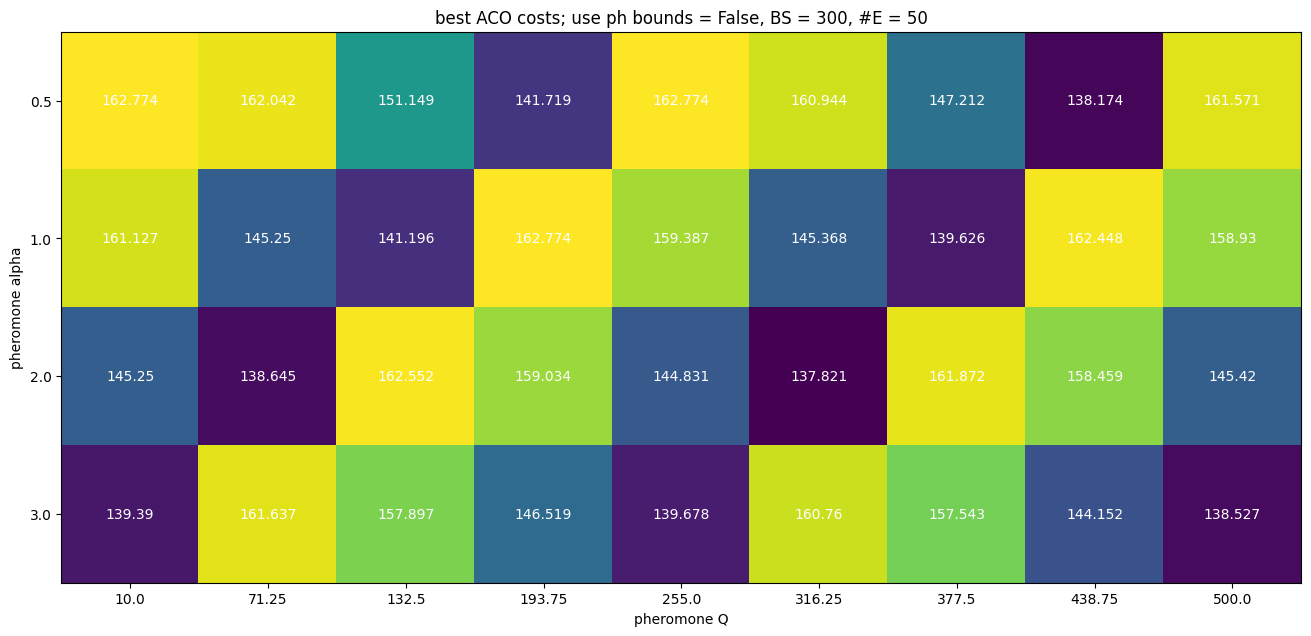

In [130]:
fig, ax = plt.subplots(1, 1, figsize = (16, 9))

plot_ube_v2(ax, ht_res, ubes[0])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

plot_ube(ax[0], ht_res, ubes[0])
plot_ube(ax[1], ht_res, ubes[3])

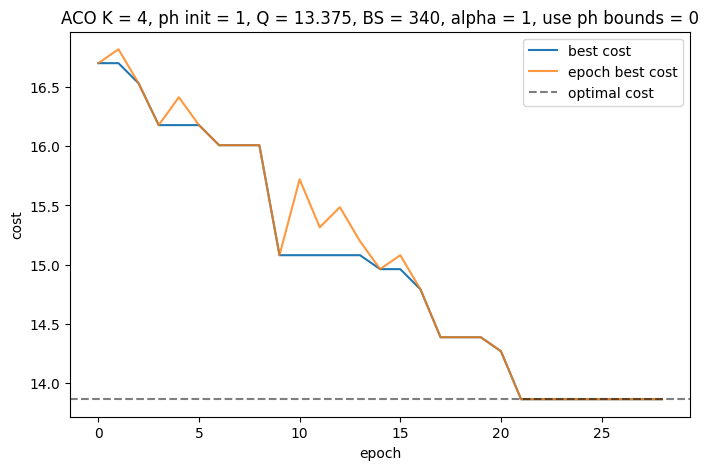

In [156]:
# fname = "/home/vlad/Desktop/Probleme/LaburiSOS/Proiect/logs/1768848282640.json"
fname = "/home/vlad/Desktop/Probleme/LaburiSOS/Proiect/logs_k_4/1768828404057.json"
# fname = "/home/vlad/Desktop/Probleme/LaburiSOS/Proiect/logs_k_4/1768828456006.json"

fig, ax = plt.subplots(1, 1, figsize = (8, 5))
with open(fname) as fin:
    ht = json.load(fin)
    
    ax.plot(ht["bo_cost"])
    ax.plot(ht["best_cost"], alpha = 0.8)
    ax.axhline(ht["MIN_COST"], c = 'k', ls = '--', alpha = 0.5)
    ax.legend(["best cost", "epoch best cost", "optimal cost"])
    
    ax.set_xlabel("epoch")
    ax.set_ylabel("cost")
    
    ax.set_title(f"ACO K = {ht['K'][0]}, ph init = {ht['PHEROM_INIT'][0]}, Q = {ht['PHEROM_Q'][0]}, BS = {ht['BATCH_SIZE'][0]}, alpha = {ht['PHEROM_EXP'][0] if 'PHEROM_EXP' in ht else 1}, use ph bounds = {ht['USE_PHEROM_BOUNDS'][0]}")

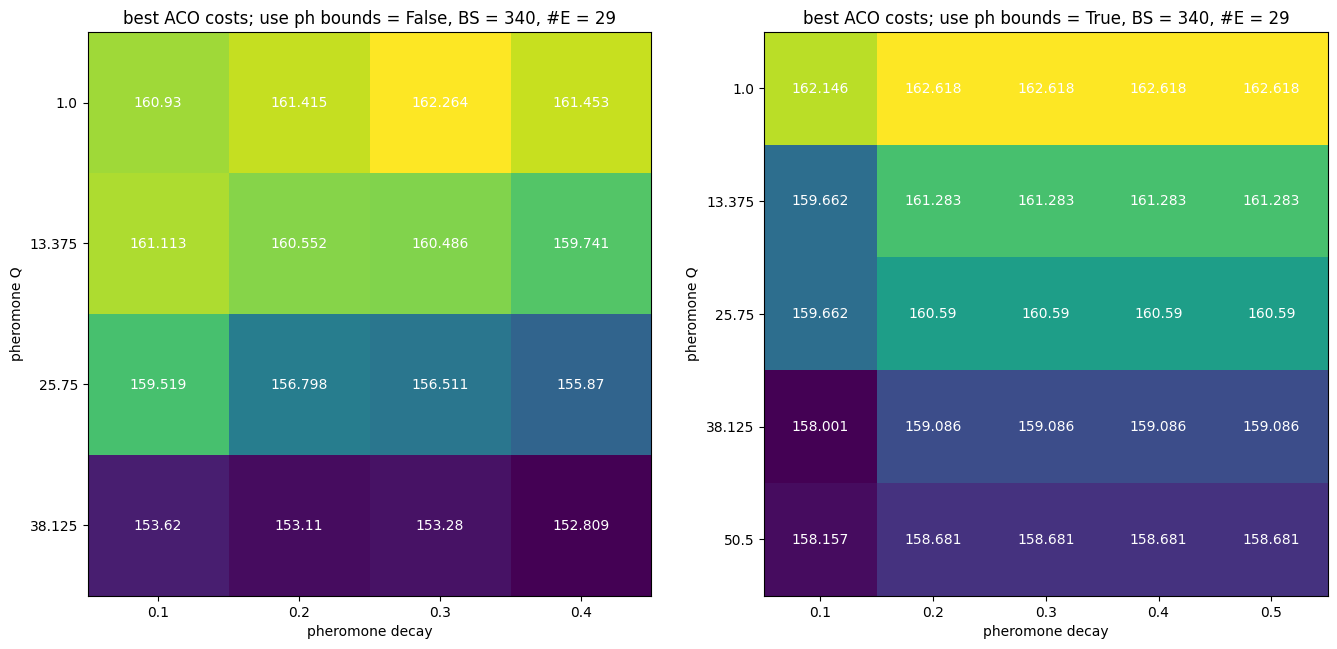

In [105]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

plot_ube(ax[0], ht_res, ubes[0])
plot_ube(ax[1], ht_res, ubes[3])

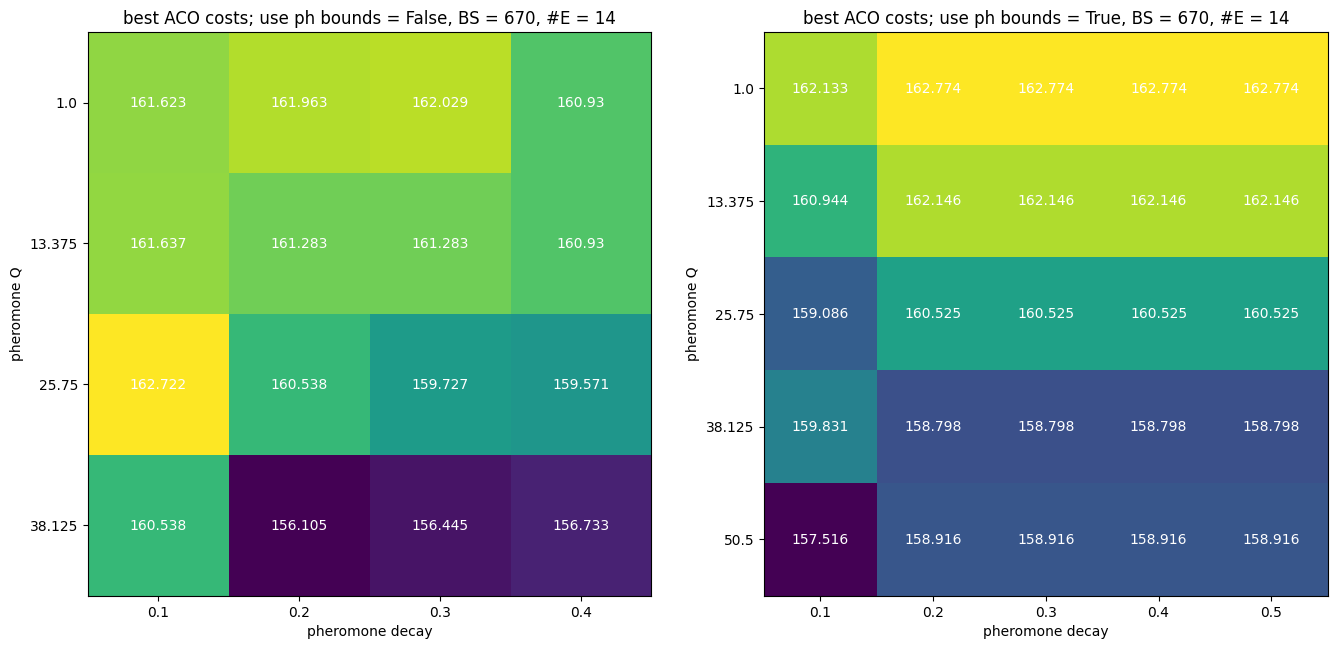

In [107]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

plot_ube(ax[0], ht_res, ubes[1])
plot_ube(ax[1], ht_res, ubes[4])